## Rotating and then normalizing orientation of a 3D paralleloid with the numpy version

In [1]:
import numpy as np 
import numpy.random as rdn
from plot_field import plot_scalar_field, plot_inertia_numpy
from rotation import get_rotation_matrix, rotate
from inertia import barycenter_field, get_rotation_params_torch, normalize_orientation
%matplotlib widget

In [2]:
rect = np.array([(i,j,k) for i in range(10,45) for j in range(10,25) for k in range(10,15)])
tensor0 = np.zeros((50,50,50))
for a in rect:
    tensor0[a[0], a[1], a[2]] = 1.
barycenter = barycenter_field(tensor0)
print("barycenter =", barycenter)

barycenter = [27. 17. 12.]


#### Plotting the 3D scalar field
The image appears a little blurred because the alpha channel is leveraged so as to show the whole 3D space. <br>
In order to cancel the blurring effect, a threshold can be applied, however it is not done here.

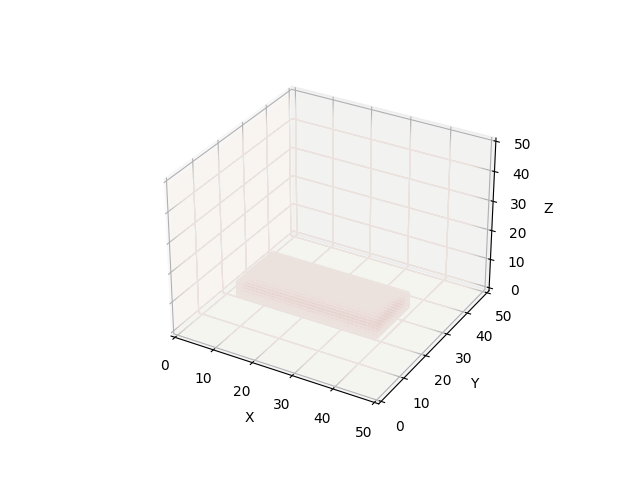

In [3]:
plot_scalar_field(tensor0)

#### Axes of rotation can be plotted with the following command:

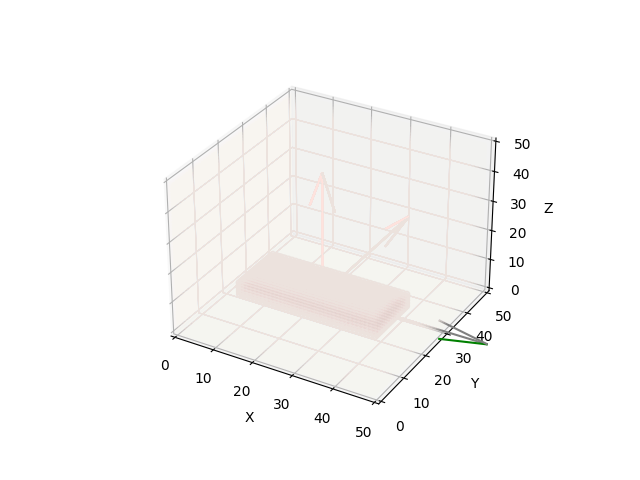

In [4]:
plot_inertia_numpy(tensor0)

#### A random angle and a random vector are generated

In [5]:
angle = rdn.rand(1)[0]*np.pi
normal = rdn.rand(3)
normal /= np.linalg.norm(normal)
print("angle = {}\nnormal vector = {}".format(angle, normal))

angle = 2.7619417220634146
normal vector = [0.91928221 0.12258617 0.37402253]


## Rotate the paralleloid around its barycenter <br>
Angle, normal vector and barycenter are computed above

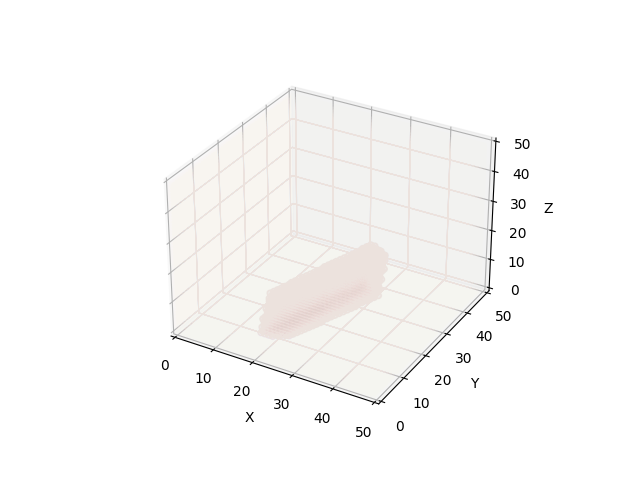

In [6]:
rotation_matrix = get_rotation_matrix(normal, angle)
rect_rotated = rotate(rotation_matrix, tensor0, barycenter)
plot_scalar_field(rect_rotated)

In theory, the barycenter should be rotation invariant. <br>
However, because of discretization a small difference can be observed, especially if the 3D image is cropped.

In [7]:
print("barycenter after rotation : {}".format(barycenter_field(rect_rotated)))

barycenter after rotation : [27.20825224 17.10237446 12.30362009]


Rotation vectors can be plotted after rotation.

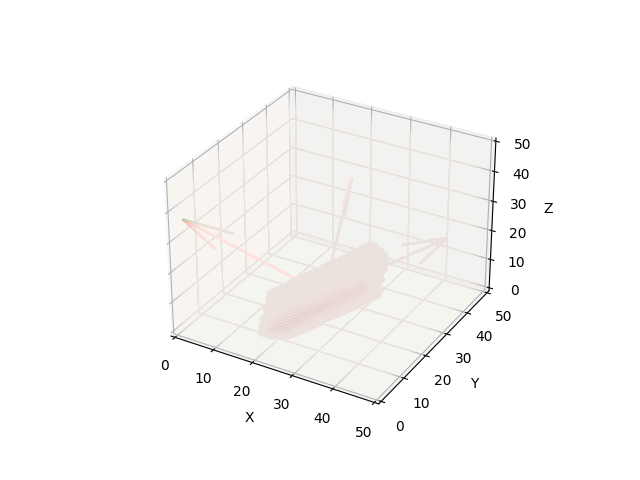

In [8]:
plot_inertia_numpy(rect_rotated)

Orientation of the 3D paralleloid is then normalized in 1 line:

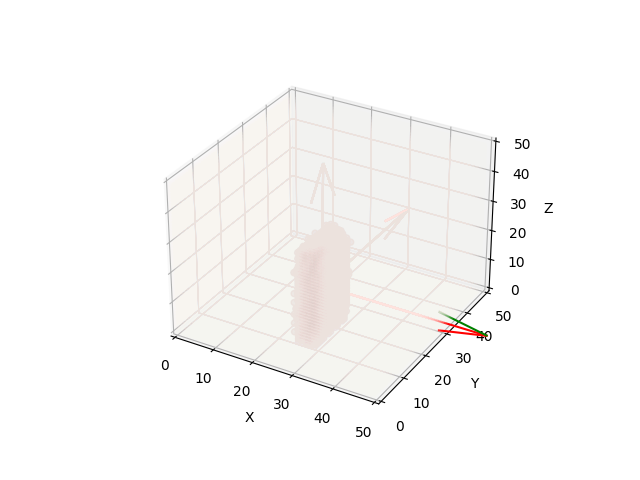

In [9]:
rect_normalized = normalize_orientation(rect_rotated)
plot_inertia_numpy(rect_normalized)